In [2]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
   ---------------------------------------- 2.4/331.9 MB 11.2 MB/s eta 0:00:30
    --------------------------------------- 4.2/331.9 MB 10.1 MB/s eta 0:00:33
    --------------------------------------- 6.3/331.9 MB 10.2 MB/s eta 0:00:33
   - -------------------------------------- 8.4/331.9 MB 10.4 MB/s eta 0:00:32
   - -------------------------------------- 10.5/331.9 MB 10.1 MB/s eta 0:00:32
   - -------------------------------------- 12.6/331.9 MB 10.2 MB/s eta 0:00:32
   - -------------------------------------- 14.7/331.9 MB 10.1 MB/s eta 0:00:32
   - -------------------------------------- 16.3/331.9 MB 9.8 MB/s eta 0:00:33
   -- ------------------------------------- 18.1/331.9 MB 9.8 MB/s eta 0:00:33
   -- ------------------------------------- 19.9/331.9 MB 9.6 MB/s eta 0:00:33
   -- ------------------------------------- 21.2/331.9 MB 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.37.1 requires protobuf<6,>=3.20, but you have protobuf 6.33.0 which is incompatible.


Feature matrix (x_train): (60000, 28, 28)
Target matrix (y_train): (60000,)
Feature matrix (x_test): (10000, 28, 28)
Target matrix (y_test): (10000,)


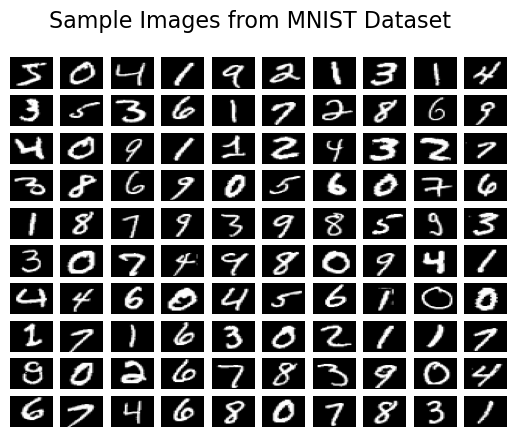

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3893 - loss: 2.1024 - val_accuracy: 0.6531 - val_loss: 1.7626
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7100 - loss: 1.4307 - val_accuracy: 0.7928 - val_loss: 1.0719
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8140 - loss: 0.8895 - val_accuracy: 0.8595 - val_loss: 0.6837
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8615 - loss: 0.6143 - val_accuracy: 0.8860 - val_loss: 0.5008
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8842 - loss: 0.4778 - val_accuracy: 0.9007 - val_loss: 0.4080
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8971 - loss: 0.4026 - val_accuracy: 0.9071 - val_loss: 0.3551
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9051 - loss: 0.3568 - val_accuracy: 0.9144 - val_loss: 0.3201
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9112 - loss: 0.3253 - val_accuracy: 0.9186 - v

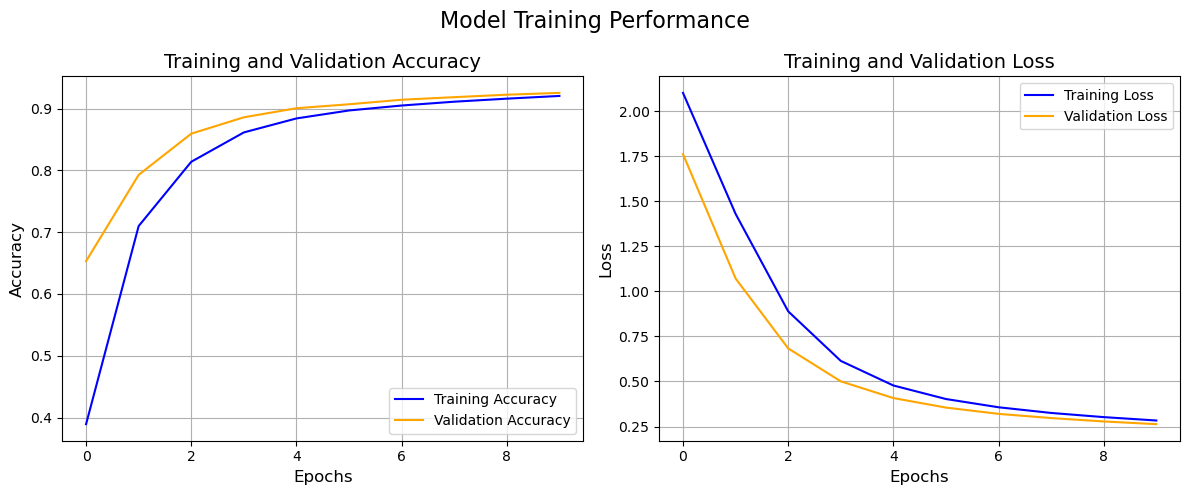

In [2]:
#import libraries 
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

#Load MNIST dataset 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

#Normalize image pixel values by dividing by 255 (gray scale) 
gray_scale = 255
x_train = x_train.astype('float32') / gray_scale
x_test = x_test.astype('float32') / gray_scale

#Checking the shape of the feature and target matrices 
print("Feature matrix (x_train):", x_train.shape)
print("Target matrix (y_train):", y_train.shape)
print("Feature matrix (x_test):", x_test.shape)
print("Target matrix (y_test):", y_test.shape)

#Visualizing 100 images from the training data 
fig, ax = plt.subplots(10, 10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_train[k].reshape(28, 28), aspect='auto', cmap='gray')
        ax[i][j].axis('off') 
        k += 1
plt.suptitle("Sample Images from MNIST Dataset", fontsize=16)
plt.show()

#Building the Sequential Neural Network Model 
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='sigmoid'),  
    Dense(128, activation='sigmoid'), 
    Dense(10, activation='softmax'),  
])

#Compiling the model 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Training the model 
history = model.fit(x_train, y_train, epochs=10, 
                    batch_size=2000, 
                    validation_split=0.2)

#Evaluating the model on test data 
results = model.evaluate(x_test, y_test, verbose=0)
print('Test loss, Test accuracy:', results)

#Plotting Accuracy and Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)
plt.suptitle("Model Training Performance", fontsize=16)
plt.tight_layout()
plt.show()